## Глубокое обучение в компьютерном зрении.

### Урок 1. Обработка изображений и компьютерное зрение.

**Напишите на Python реализацию как минимум одного алгоритма на выбор: любая на выбор цветовая обработка, перевод в другое цветовое пространство или фильтрация. Изображение выберите самостоятельно.**

In [3]:
import numpy as np

import imageio

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img = imageio.imread('Brig.jpg')

In [5]:
img.shape

(1142, 1600, 3)

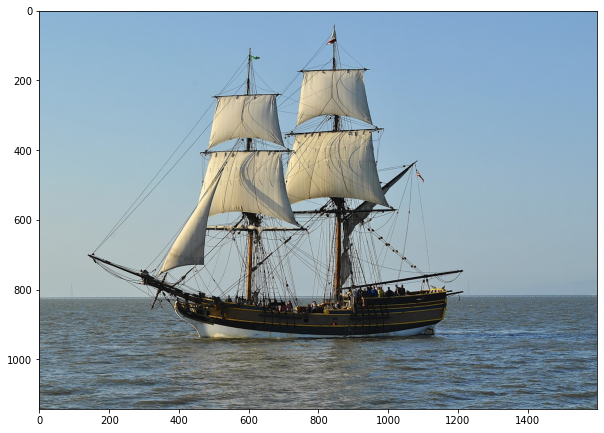

In [6]:
plt.figure(figsize=(10,10))

plt.imshow(img)

**Создадим линейный фильтр.**

In [7]:
win_size = (5, 5)

w = np.array([
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1], 
              [-1, -1, 0, 1, 1]
              ])

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        for k in range(out_img.shape[2]):
            x = img[i: i + w.shape[0], j: j + w.shape[1], k]
            out_img[i, j, k] = np.sum(w * x)

In [8]:
out_img = out_img.astype(np.uint8)

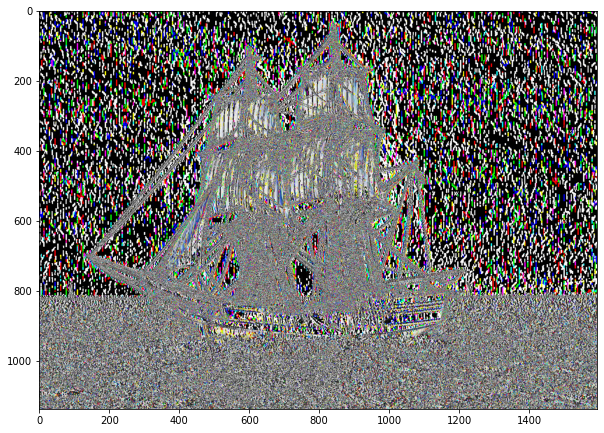

In [9]:
plt.figure(figsize=(10,10))

plt.imshow(out_img);

In [10]:
win_size = (5, 5)

w = (w + w.T)/2

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        for k in range(out_img.shape[2]):
            x = img[i: i + w.shape[0], j: j + w.shape[1], k]
            out_img[i, j, k] = np.sum(w * x)

In [11]:
out_img = out_img.astype(np.uint8)

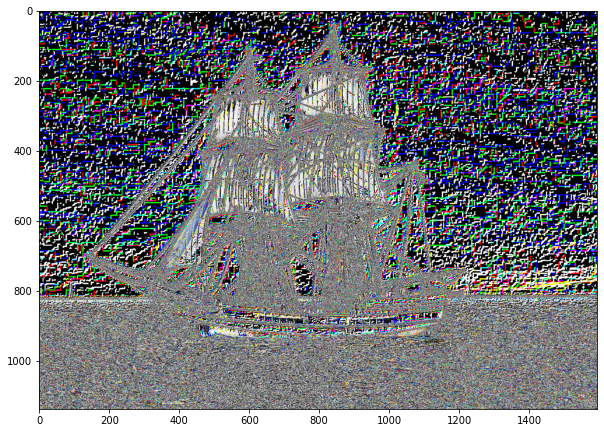

In [12]:
plt.figure(figsize=(10,10))

plt.imshow(out_img)

**Box Blur.**

In [13]:
win_size = (11, 11)

w = np.ones(win_size, dtype=np.float32)

w /= np.sum(w)

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        for k in range(out_img.shape[2]):
            x = img[i: i + w.shape[0], j: j + w.shape[1], k]
            out_img[i, j, k] = np.sum(w * x)

In [14]:
out_img = out_img.astype(np.uint8)

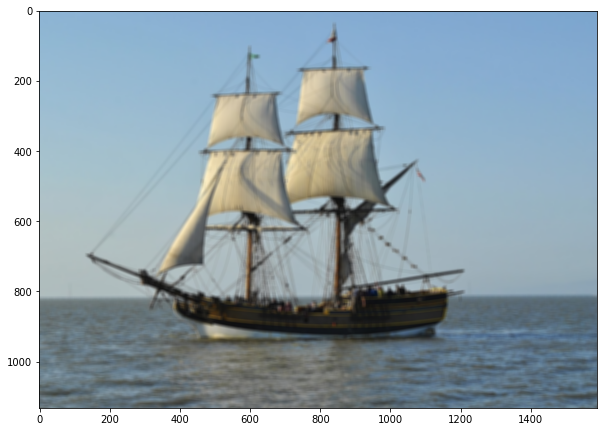

In [15]:
plt.figure(figsize=(10,10))

plt.imshow(out_img)

**Gaussian blur.**

In [16]:
win_size = (11, 11)

sigma = 3

w = np.ones(win_size, dtype=np.float32)

for i in range(w.shape[0]):
    for j in range(w.shape[1]):
        w[i, j] = np.exp(- (i - w.shape[0] // 2)**2 / sigma**2 / 2
                      - (j - w.shape[1] // 2)**2 / sigma**2 / 2)
        
w /= np.sum(w)

out_img = np.zeros(
    (img.shape[0] - w.shape[0] + 1,
     img.shape[1] - w.shape[1] + 1,
     img.shape[2]),
    dtype=np.float32
)

for i in range(out_img.shape[0]):
    for j in range(out_img.shape[1]):
        for k in range(out_img.shape[2]):
            x = img[i: i + w.shape[0], j: j + w.shape[1], k]
            out_img[i, j, k] = np.sum(w * x)

In [17]:
out_img = out_img.astype(np.uint8)

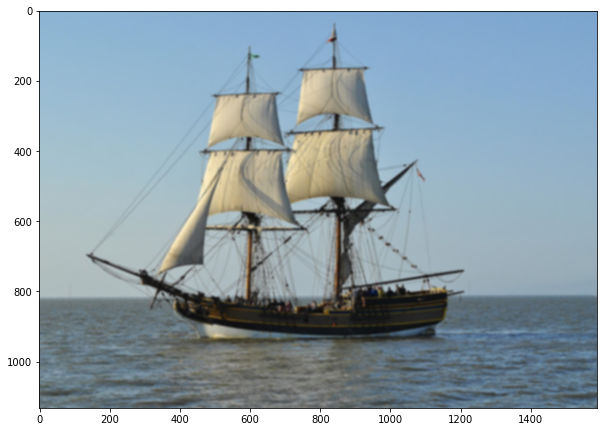

In [18]:
plt.figure(figsize=(10,10))

plt.imshow(out_img);